In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import shap

In [80]:
# load the cleaned and processed data
os.chdir('/Users/jed/Documents/JED/Dataiku/drive-download-20250106T224222Z-001')
!ls
#load the train and test datasets into pandas df
train_data=pd.read_csv('census_income_learn_ready_for_modelling.csv')
train_data.drop('Unnamed: 0', axis=1, inplace=True)
train_data.describe()
train_data.dtypes

#load the train and test datasets into pandas df
test_data=pd.read_csv('census_income_test_ready_for_modelling.csv')
test_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.describe()
test_data.dtypes

census_income_additional_info.pdf
census_income_learn.csv
census_income_learn_ready_for_modelling.csv
census_income_metadata.txt
census_income_test.csv
census_income_test_ready_for_modelling.csv


TARGET_bin                             int64
Age                                    int64
Male                                   int64
Married                                int64
Race_white                             int64
Education_Grade-school               float64
Education_Graduate                   float64
Education_HS-grad                    float64
Education_HS-nongrad                 float64
Employment_Government                float64
Employment_Not in paid employment    float64
Employment_Private                   float64
Employment_Self-employed             float64
Household_Child                      float64
Household_Householder                float64
Household_Not householder            float64
Parents_birth                          int64
dtype: object

In [81]:
# convert float columns to integers
df=train_data.copy()
df_test=test_data.copy()
float_cols = df.select_dtypes(include='float').columns 
df[float_cols] = df[float_cols].astype(int)  
#rename label col
df = df.rename(columns={'TARGET_bin': 'Label'})

float_cols = df_test.select_dtypes(include='float').columns 
df_test[float_cols] = df_test[float_cols].astype(int)  
#rename label col
df_test = df_test.rename(columns={'TARGET_bin': 'Label'})
df_test.dtypes

Label                                int64
Age                                  int64
Male                                 int64
Married                              int64
Race_white                           int64
Education_Grade-school               int64
Education_Graduate                   int64
Education_HS-grad                    int64
Education_HS-nongrad                 int64
Employment_Government                int64
Employment_Not in paid employment    int64
Employment_Private                   int64
Employment_Self-employed             int64
Household_Child                      int64
Household_Householder                int64
Household_Not householder            int64
Parents_birth                        int64
dtype: object

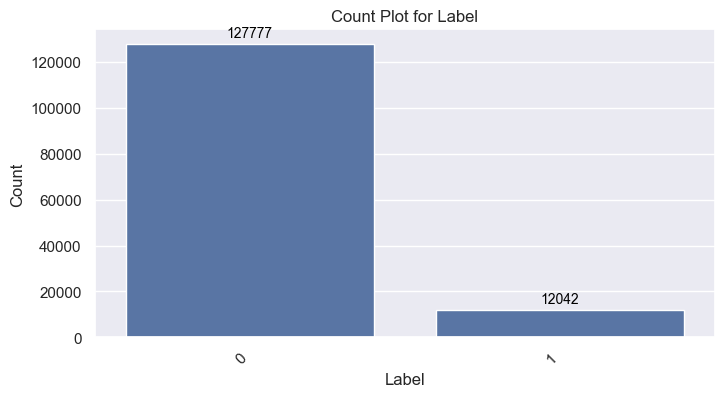

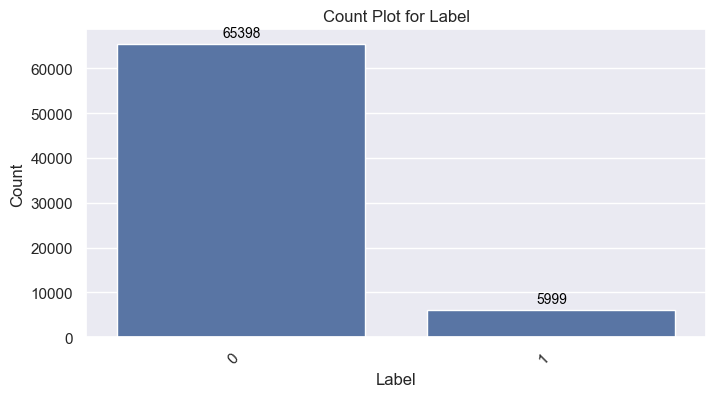

In [82]:
category_counts = df['Label'].value_counts().sort_index()

sns.set()
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Label', data=df)

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.title('Count Plot for Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

category_counts = df_test['Label'].value_counts().sort_index()

sns.set()
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Label', data=df_test)

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.title('Count Plot for Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()




In [84]:
from sklearn.preprocessing import StandardScaler

y_train=df['Label']
X_train=df.drop('Label', axis=1)

y_test=df_test['Label']
X_test=df_test.drop('Label', axis=1)


#Scale Data
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [85]:
print(len(y_test))
print(sum(y_test))

71397
5999


In [86]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import permutation_test_score


RANDOM_STATE = 1903

# a selection of classifiers with default settings 
classifiers = {
    'Logistic Regression':LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'K nearest Neighbour': KNeighborsClassifier(3)
}



In [87]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score, recall_score, confusion_matrix

#loop through each classifier and print out metrics
for (name, clf) in classifiers.items():

    print(name,clf)
    clf.fit(X_train_scaled, y_train)

    # Evaluating the score using test data:
    y_pred=clf.predict(X_test_scaled)

    confusion_log = confusion_matrix(y_test, y_pred)
    report_log = classification_report(y_test, y_pred)
    roc_score_log = roc_auc_score(y_test, y_pred)

    print("\nConfusion Matrix:\n", confusion_log)
    print("\nClassification Report:\n\n", report_log)
    print("\nROC-AUC Score:", roc_score_log)


Logistic Regression LogisticRegression(max_iter=500)

Confusion Matrix:
 [[64184  1214]
 [ 4398  1601]]

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.98      0.96     65398
           1       0.57      0.27      0.36      5999

    accuracy                           0.92     71397
   macro avg       0.75      0.62      0.66     71397
weighted avg       0.91      0.92      0.91     71397


ROC-AUC Score: 0.6241572770767868
Random Forest RandomForestClassifier(random_state=1903)

Confusion Matrix:
 [[63799  1599]
 [ 4148  1851]]

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.98      0.96     65398
           1       0.54      0.31      0.39      5999

    accuracy                           0.92     71397
   macro avg       0.74      0.64      0.67     71397
weighted avg       0.91      0.92      0.91     71397


ROC-AUC Score: 0.642050568118938
Decision Tree 

In [88]:
# add class_weight='balanced' param to the models that have that function

classifiers = {
    'Logistic Regression':LogisticRegression(max_iter=500, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'),
}

# loop throughh each classifier and print metrics to see how the param impacts scores
for (name, clf) in classifiers.items():

    print(name,clf)
    clf.fit(X_train_scaled, y_train)

    # Evaluating the score using test data:
    y_pred=clf.predict(X_test_scaled)

    confusion_log = confusion_matrix(y_test, y_pred)
    report_log = classification_report(y_test, y_pred)
    roc_score_log = roc_auc_score(y_test, y_pred)

    print("\nConfusion Matrix:\n", confusion_log)
    print("\nClassification Report:\n\n", report_log)
    print("\nROC-AUC Score:", roc_score_log)


Logistic Regression LogisticRegression(class_weight='balanced', max_iter=500)

Confusion Matrix:
 [[48957 16441]
 [  679  5320]]

Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.75      0.85     65398
           1       0.24      0.89      0.38      5999

    accuracy                           0.76     71397
   macro avg       0.62      0.82      0.62     71397
weighted avg       0.92      0.76      0.81     71397


ROC-AUC Score: 0.8177076718613321
Random Forest RandomForestClassifier(class_weight='balanced', random_state=1903)

Confusion Matrix:
 [[53828 11570]
 [ 1447  4552]]

Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.82      0.89     65398
           1       0.28      0.76      0.41      5999

    accuracy                           0.82     71397
   macro avg       0.63      0.79      0.65     71397
weighted avg       0.92      0.82      0.85     71397

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import permutation_test_score
from sklearn.inspection import permutation_importance

voting_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression(class_weight='balanced')),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE)),
    ('dt', DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'))
], voting='soft')

voting_model.fit(X_train_scaled, y_train)
y_pred=voting_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

result = permutation_importance(voting_model, X_test_scaled, y_test, n_repeats=5, random_state=RANDOM_STATE)
pd.DataFrame(
        {
            k: result[k]
            for k in (
                "importances_mean",
                "importances_std",
            )
        },
        index=X_test.columns,
    ).sort_values(by="importances_mean", ascending=False)


feature_importance = result.importances_mean
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center",color='green')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance")

for i in range(0,len(sorted_idx)):
    print(feature_importance[sorted_idx[i]], np.array(X_train.columns)[sorted_idx[i]])

[[52572 12826]
 [ 1211  4788]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     65398
           1       0.27      0.80      0.41      5999

    accuracy                           0.80     71397
   macro avg       0.62      0.80      0.64     71397
weighted avg       0.92      0.80      0.84     71397

0.8010054082991629


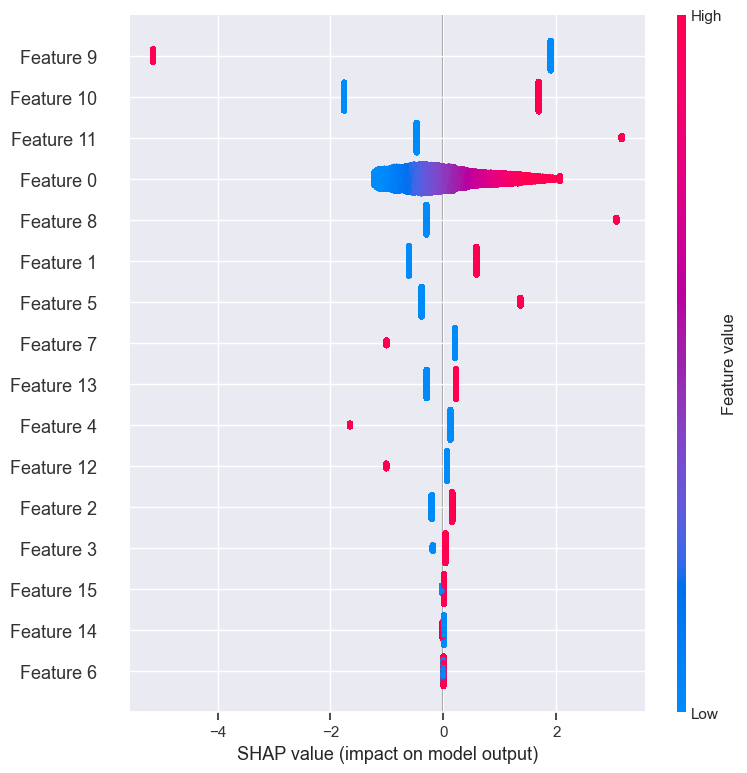

In [54]:
# Train model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Explain model predictions
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_train_scaled)

# Plot summary
shap.summary_plot(shap_values, X_train)

-0.043920612910906674 Employment_Not in paid employment
-0.015121083518915368 Employment_Private
-0.013008949955880533 Household_Child
-0.01098365477541079 Household_Householder
-0.0069638780340910865 Education_HS-nongrad
-0.004734092468871287 Married
-0.0024342759499698997 Education_Grade-school
-0.0009832345896886752 Race_white
-0.0001932854321610833 Parents_birth
-3.3614857767183536e-05 Household_Not householder
7.003095368147693e-05 Education_HS-grad
0.0014426376458394285 Male
0.0024090648066444676 Employment_Government
0.00308696443828167 Employment_Self-employed
0.004465173606734152 Education_Graduate
0.022082160314859167 Age


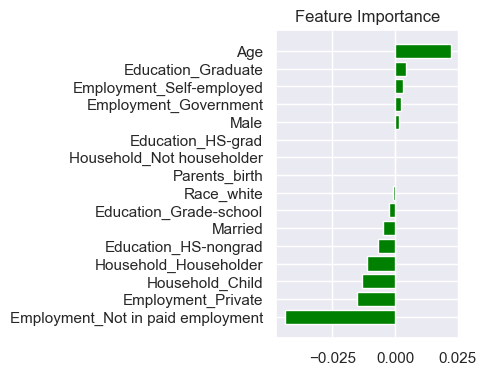

In [ ]:
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=5, random_state=RANDOM_STATE)
pd.DataFrame(
        {
            k: result[k]
            for k in (
                "importances_mean",
                "importances_std",
            )
        },
        index=X_test.columns,
    ).sort_values(by="importances_mean", ascending=False)


feature_importance = result.importances_mean
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center",color='green')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance")

for i in range(0,len(sorted_idx)):
    print(feature_importance[sorted_idx[i]], np.array(X_train.columns)[sorted_idx[i]])

                              Feature  Coefficient
10                 Employment_Private     1.721412
8               Employment_Government     1.045640
11           Employment_Self-employed     1.000027
0                                 Age     0.772730
5                  Education_Graduate     0.706256
1                                Male     0.597428
13              Household_Householder     0.259927
2                             Married     0.181046
3                          Race_white     0.081156
15                      Parents_birth     0.013082
6                   Education_HS-grad     0.001748
14          Household_Not householder    -0.009182
12                    Household_Child    -0.367486
7                Education_HS-nongrad    -0.421976
4              Education_Grade-school    -0.497665
9   Employment_Not in paid employment    -3.206580


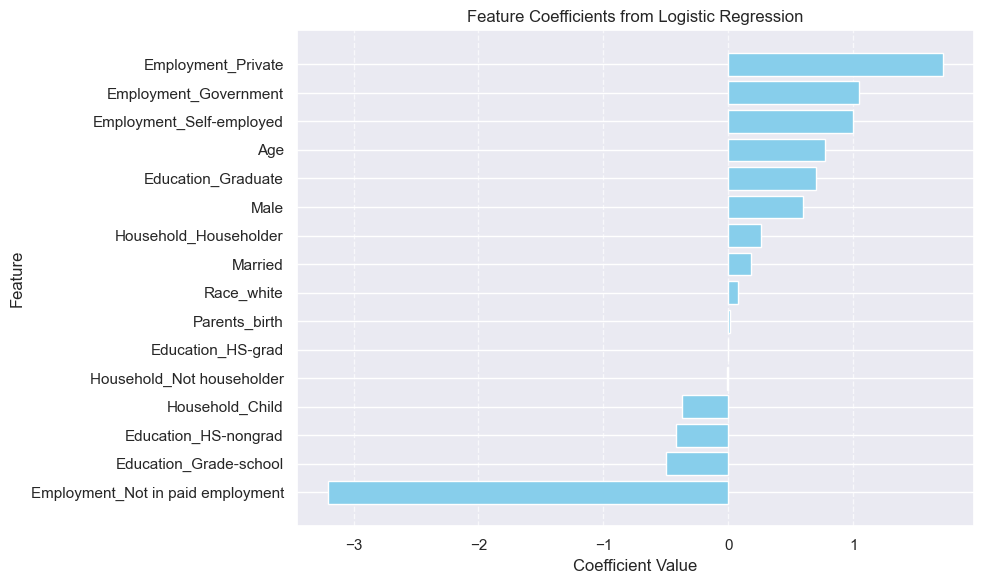

              precision    recall  f1-score   support

           0       0.99      0.75      0.85     65398
           1       0.24      0.89      0.38      5999

    accuracy                           0.76     71397
   macro avg       0.62      0.82      0.62     71397
weighted avg       0.92      0.76      0.81     71397

AUC-ROC: 0.8968850028171459


In [62]:


coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})
sorted_coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Display the sorted coefficients
print(sorted_coefficients)

plt.figure(figsize=(10, 6))
plt.barh(sorted_coefficients['Feature'], sorted_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients from Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest coefficient at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Predictions
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_probs))



0.4051430517711172
              precision    recall  f1-score   support

           0       0.98      0.81      0.88     65398
           1       0.27      0.79      0.41      5999

    accuracy                           0.80     71397
   macro avg       0.62      0.80      0.64     71397
weighted avg       0.92      0.80      0.84     71397



Text(0.5, 1.0, 'Feature Importance')

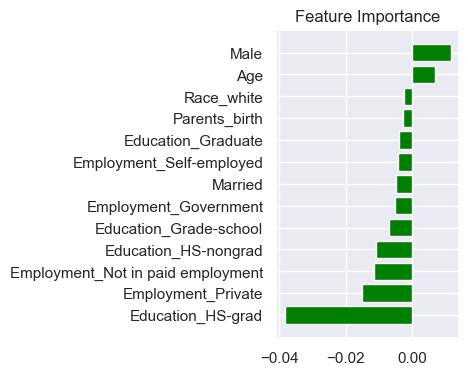

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, recall_score
from sklearn.inspection import permutation_importance

random_state=1903

clf=RandomForestClassifier(class_weight = "balanced")
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='binary')
print(f1)
print(classification_report(y_test, y_pred))

result = permutation_importance(clf, X_test, y_test, n_repeats=5, random_state=1903)
pd.DataFrame(
        {
            k: result[k]
            for k in (
                "importances_mean",
                "importances_std",
            )
        },
        index=X_test.columns,
    ).sort_values(by="importances_mean", ascending=False)


feature_importance = result.importances_mean
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center",color='green')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance")

